Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=850Q5xIcUZI&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=18

# Image Classification (Pytorch, CIFAR10)

Used Resources: \
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
device ='cpu'

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 39362701.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


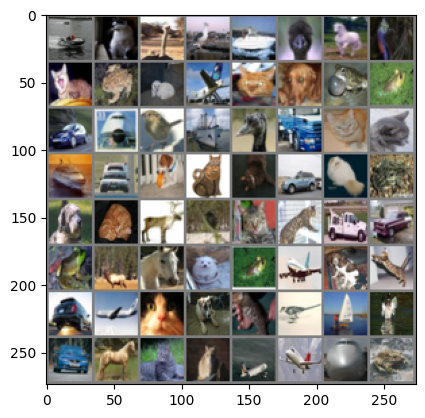

ship  cat   bird  bird  ship  bird  horse bird  cat   frog  dog   plane cat   dog   frog  frog  car   plane bird  ship  bird  truck cat   cat   ship  car   dog   cat   cat   car   cat   frog  dog   cat   deer  bird  cat   cat   truck car   frog  deer  horse dog   frog  plane cat   cat   car   plane cat   dog   cat   bird  ship  bird  car   horse cat   cat   plane plane plane frog 


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [7]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
epochs = 5

for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs=inputs.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'epoch {epoch}:loss:{running_loss/len(trainloader)}')

epoch 0:loss:2.300423434933128
epoch 1:loss:2.19489130918937
epoch 2:loss:1.8773294600379435
epoch 3:loss:1.710630548122289
epoch 4:loss:1.6047063937882329


In [9]:
running_loss/len(trainloader)

1.6047063937882329

Let's quickly save our trained model:



In [10]:
PATH = 'model_cifar10.pth'
torch.save(net.state_dict(), PATH)

In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

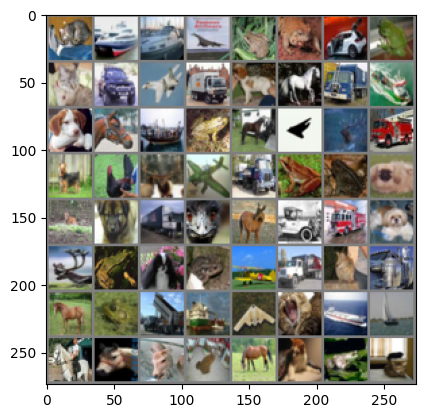

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car  


In [12]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted labels: ', ' '.join(f'{classes[predicted[j]]:3s}'
                              for j in range(10)))

Predicted labels:  cat ship car ship frog frog car bird dog car


In [16]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 43 %


In [17]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 47.3 %
Accuracy for class: car   is 64.4 %
Accuracy for class: bird  is 25.9 %
Accuracy for class: cat   is 15.4 %
Accuracy for class: deer  is 36.0 %
Accuracy for class: dog   is 26.2 %
Accuracy for class: frog  is 54.8 %
Accuracy for class: horse is 66.5 %
Accuracy for class: ship  is 47.0 %
Accuracy for class: truck is 52.5 %
